# U-Net Architecture

In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.utils import save_image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from PIL import Image
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# U-Net Architecture
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        
        # Define encoder layers
        self.enc1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.enc2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.enc3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.enc4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        
        # Define bottleneck layer
        self.bottleneck = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        
        # Define decoder layers with concatenation in mind
        self.dec4 = nn.Conv2d(1024 + 512, 512, kernel_size=3, padding=1)
        self.dec3 = nn.Conv2d(512 + 256, 256, kernel_size=3, padding=1)
        self.dec2 = nn.Conv2d(256 + 128, 128, kernel_size=3, padding=1)
        self.dec1 = nn.Conv2d(128 + 64, 64, kernel_size=3, padding=1)
        
        # Final output layer
        self.final = nn.Conv2d(64, 1, kernel_size=1)  # Output single-channel heatmap

    def forward(self, x):
        # Encoder with max-pooling
        x1 = F.relu(self.enc1(x))
        x2 = F.relu(self.enc2(F.max_pool2d(x1, 2)))
        x3 = F.relu(self.enc3(F.max_pool2d(x2, 2)))
        x4 = F.relu(self.enc4(F.max_pool2d(x3, 2)))
        
        # Bottleneck
        x = F.relu(self.bottleneck(F.max_pool2d(x4, 2)))
        
        # Decoder with upsampling and concatenation of encoder outputs
        x = F.interpolate(x, scale_factor=2, mode='bilinear', align_corners=True)
        x = torch.cat([x, x4], dim=1)  # Concatenate encoder output from enc4
        x = F.relu(self.dec4(x))
        
        x = F.interpolate(x, scale_factor=2, mode='bilinear', align_corners=True)
        x = torch.cat([x, x3], dim=1)  # Concatenate encoder output from enc3
        x = F.relu(self.dec3(x))
        
        x = F.interpolate(x, scale_factor=2, mode='bilinear', align_corners=True)
        x = torch.cat([x, x2], dim=1)  # Concatenate encoder output from enc2
        x = F.relu(self.dec2(x))
        
        x = F.interpolate(x, scale_factor=2, mode='bilinear', align_corners=True)
        x = torch.cat([x, x1], dim=1)  # Concatenate encoder output from enc1
        x = F.relu(self.dec1(x))
        
        # Final layer (no activation for regression tasks)
        return self.final(x)

# Training Model (do not run!)

Epoch [1/50]: 100%|██████████| 8/8 [17:46<00:00, 133.27s/batch, loss=0.0338]


Epoch [1/50], Loss: 0.04650321044027805
Validation Loss: 0.038506655022501945


Epoch [2/50]: 100%|██████████| 8/8 [17:45<00:00, 133.16s/batch, loss=0.04]  


Epoch [2/50], Loss: 0.03683678712695837
Validation Loss: 0.03997795656323433


Epoch [3/50]: 100%|██████████| 8/8 [17:48<00:00, 133.61s/batch, loss=0.0299]


Epoch [3/50], Loss: 0.03535324102267623
Validation Loss: 0.03895330987870693


Epoch [4/50]: 100%|██████████| 8/8 [17:47<00:00, 133.43s/batch, loss=0.0256]


Epoch [4/50], Loss: 0.03455213480629027
Validation Loss: 0.038827281445264816


Epoch [5/50]: 100%|██████████| 8/8 [17:56<00:00, 134.62s/batch, loss=0.0349]


Epoch [5/50], Loss: 0.035104379523545504
Validation Loss: 0.03781685046851635


Epoch [6/50]: 100%|██████████| 8/8 [17:55<00:00, 134.41s/batch, loss=0.0386]


Epoch [6/50], Loss: 0.03485418437048793
Validation Loss: 0.03669190593063831


Epoch [7/50]: 100%|██████████| 8/8 [17:51<00:00, 133.88s/batch, loss=0.0225]


Epoch [7/50], Loss: 0.03224634053185582
Validation Loss: 0.03680270537734032


Epoch [8/50]: 100%|██████████| 8/8 [17:53<00:00, 134.19s/batch, loss=0.0262]


Epoch [8/50], Loss: 0.032608236419036984
Validation Loss: 0.03810092806816101


Epoch [9/50]: 100%|██████████| 8/8 [17:52<00:00, 134.04s/batch, loss=0.0302]


Epoch [9/50], Loss: 0.03355276491492987
Validation Loss: 0.03629472851753235


Epoch [10/50]: 100%|██████████| 8/8 [17:50<00:00, 133.86s/batch, loss=0.0214]


Epoch [10/50], Loss: 0.0315570505335927
Validation Loss: 0.035968225449323654


Epoch [11/50]: 100%|██████████| 8/8 [17:51<00:00, 133.97s/batch, loss=0.0229]


Epoch [11/50], Loss: 0.031603147042915225
Validation Loss: 0.034481375478208065


Epoch [12/50]: 100%|██████████| 8/8 [17:52<00:00, 134.11s/batch, loss=0.0239]


Epoch [12/50], Loss: 0.031038568820804358
Validation Loss: 0.03422536887228489


Epoch [13/50]: 100%|██████████| 8/8 [17:53<00:00, 134.14s/batch, loss=0.0287]


Epoch [13/50], Loss: 0.03139953990466893
Validation Loss: 0.033902146853506565


Epoch [14/50]: 100%|██████████| 8/8 [17:51<00:00, 133.98s/batch, loss=0.0357]


Epoch [14/50], Loss: 0.03162503684870899
Validation Loss: 0.03362089674919844


Epoch [15/50]: 100%|██████████| 8/8 [17:52<00:00, 134.07s/batch, loss=0.0225]


Epoch [15/50], Loss: 0.02959108119830489
Validation Loss: 0.033243121579289436


Epoch [16/50]: 100%|██████████| 8/8 [17:52<00:00, 134.01s/batch, loss=0.0307]


Epoch [16/50], Loss: 0.030475490260869265
Validation Loss: 0.03290947712957859


Epoch [17/50]: 100%|██████████| 8/8 [17:51<00:00, 133.98s/batch, loss=0.0286]


Epoch [17/50], Loss: 0.029904495226219296
Validation Loss: 0.033744676038622856


Epoch [18/50]: 100%|██████████| 8/8 [17:51<00:00, 133.96s/batch, loss=0.0285]


Epoch [18/50], Loss: 0.03020834317430854
Validation Loss: 0.03318849019706249


Epoch [19/50]: 100%|██████████| 8/8 [17:53<00:00, 134.15s/batch, loss=0.0274]


Epoch [19/50], Loss: 0.0300232598092407
Validation Loss: 0.0366262998431921


Epoch [20/50]: 100%|██████████| 8/8 [17:51<00:00, 133.98s/batch, loss=0.0301]


Epoch [20/50], Loss: 0.031037276377901435
Validation Loss: 0.034566023387014866


Epoch [21/50]: 100%|██████████| 8/8 [17:59<00:00, 134.89s/batch, loss=0.021] 


Epoch [21/50], Loss: 0.02953522722236812
Validation Loss: 0.03620493225753307


Epoch [22/50]: 100%|██████████| 8/8 [18:01<00:00, 135.16s/batch, loss=0.0336]


Epoch [22/50], Loss: 0.03152698650956154
Validation Loss: 0.03266017697751522


Epoch [23/50]: 100%|██████████| 8/8 [17:54<00:00, 134.36s/batch, loss=0.0279]


Epoch [23/50], Loss: 0.029446351574733853
Validation Loss: 0.03326085302978754


Epoch [24/50]: 100%|██████████| 8/8 [17:57<00:00, 134.68s/batch, loss=0.0356]


Epoch [24/50], Loss: 0.030359752476215363
Validation Loss: 0.03204850107431412


Epoch [25/50]: 100%|██████████| 8/8 [17:59<00:00, 134.90s/batch, loss=0.027] 


Epoch [25/50], Loss: 0.02923203236423433
Validation Loss: 0.032090676948428154


Epoch [26/50]: 100%|██████████| 8/8 [18:02<00:00, 135.36s/batch, loss=0.0329]


Epoch [26/50], Loss: 0.029990472830832005
Validation Loss: 0.03190211672335863


Epoch [27/50]: 100%|██████████| 8/8 [17:53<00:00, 134.23s/batch, loss=0.0325]


Epoch [27/50], Loss: 0.029577432665973902
Validation Loss: 0.03173785284161568


Epoch [28/50]: 100%|██████████| 8/8 [18:01<00:00, 135.16s/batch, loss=0.0355]


Epoch [28/50], Loss: 0.029795320006087422
Validation Loss: 0.031512338668107986


Epoch [29/50]: 100%|██████████| 8/8 [17:59<00:00, 134.96s/batch, loss=0.0275]


Epoch [29/50], Loss: 0.02889770967885852
Validation Loss: 0.03160570561885834


Epoch [30/50]: 100%|██████████| 8/8 [18:01<00:00, 135.16s/batch, loss=0.0239]


Epoch [30/50], Loss: 0.028933712746948004
Validation Loss: 0.031834579072892666


Epoch [31/50]: 100%|██████████| 8/8 [17:55<00:00, 134.41s/batch, loss=0.0224]


Epoch [31/50], Loss: 0.02841852279379964
Validation Loss: 0.03226743172854185


Epoch [32/50]: 100%|██████████| 8/8 [18:02<00:00, 135.31s/batch, loss=0.0259]


Epoch [32/50], Loss: 0.02871990716084838
Validation Loss: 0.03152512386441231


Epoch [33/50]: 100%|██████████| 8/8 [18:03<00:00, 135.47s/batch, loss=0.0206]


Epoch [33/50], Loss: 0.028126635821536183
Validation Loss: 0.03235728666186333


Epoch [34/50]: 100%|██████████| 8/8 [17:53<00:00, 134.15s/batch, loss=0.0214]


Epoch [34/50], Loss: 0.02842128905467689
Validation Loss: 0.03143622539937496


Epoch [35/50]: 100%|██████████| 8/8 [17:55<00:00, 134.50s/batch, loss=0.0325]


Epoch [35/50], Loss: 0.029243581229820848
Validation Loss: 0.032645897939801216


Epoch [36/50]: 100%|██████████| 8/8 [18:02<00:00, 135.36s/batch, loss=0.0288]


Epoch [36/50], Loss: 0.029384743189439178
Validation Loss: 0.031638817861676216


Epoch [37/50]: 100%|██████████| 8/8 [18:11<00:00, 136.40s/batch, loss=0.035] 


Epoch [37/50], Loss: 0.029594915686175227
Validation Loss: 0.03171891067177057


Epoch [38/50]: 100%|██████████| 8/8 [18:11<00:00, 136.40s/batch, loss=0.022] 


Epoch [38/50], Loss: 0.02820551348850131
Validation Loss: 0.03109455481171608


Epoch [39/50]: 100%|██████████| 8/8 [18:10<00:00, 136.25s/batch, loss=0.0217]


Epoch [39/50], Loss: 0.02775831869803369
Validation Loss: 0.03162461519241333


Epoch [40/50]: 100%|██████████| 8/8 [18:09<00:00, 136.25s/batch, loss=0.0241]


Epoch [40/50], Loss: 0.028132855193689466
Validation Loss: 0.03096298687160015


Epoch [41/50]: 100%|██████████| 8/8 [18:11<00:00, 136.40s/batch, loss=0.024] 


Epoch [41/50], Loss: 0.02798425522632897
Validation Loss: 0.03135399241000414


Epoch [42/50]: 100%|██████████| 8/8 [18:09<00:00, 136.14s/batch, loss=0.0269]


Epoch [42/50], Loss: 0.028522718464955688
Validation Loss: 0.030930140055716038


Epoch [43/50]: 100%|██████████| 8/8 [18:13<00:00, 136.75s/batch, loss=0.0301]


Epoch [43/50], Loss: 0.028460762463510036
Validation Loss: 0.031173556111752987


Epoch [44/50]: 100%|██████████| 8/8 [18:12<00:00, 136.59s/batch, loss=0.0292]


Epoch [44/50], Loss: 0.02852662350051105
Validation Loss: 0.031611145474016666


Epoch [45/50]: 100%|██████████| 8/8 [18:10<00:00, 136.34s/batch, loss=0.0237]


Epoch [45/50], Loss: 0.028033483307808638
Validation Loss: 0.031464409083127975


Epoch [46/50]: 100%|██████████| 8/8 [18:13<00:00, 136.65s/batch, loss=0.0258]


Epoch [46/50], Loss: 0.028237793361768126
Validation Loss: 0.030904358252882957


Epoch [47/50]: 100%|██████████| 8/8 [18:18<00:00, 137.27s/batch, loss=0.0274]


Epoch [47/50], Loss: 0.028134237276390195
Validation Loss: 0.031355065293610096


Epoch [48/50]: 100%|██████████| 8/8 [18:13<00:00, 136.75s/batch, loss=0.0179]


Epoch [48/50], Loss: 0.027204614132642746
Validation Loss: 0.031883382238447666


Epoch [49/50]: 100%|██████████| 8/8 [18:19<00:00, 137.39s/batch, loss=0.0274]


Epoch [49/50], Loss: 0.028192123863846064
Validation Loss: 0.03073200862854719


Epoch [50/50]: 100%|██████████| 8/8 [18:21<00:00, 137.73s/batch, loss=0.0198]


Epoch [50/50], Loss: 0.027268942445516586
Validation Loss: 0.03287528455257416


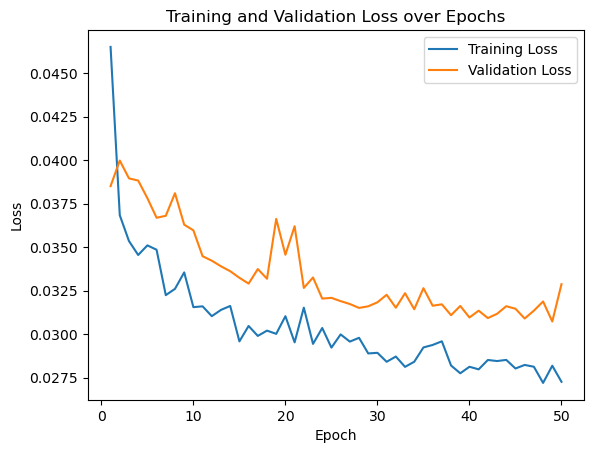

In [2]:
# Helper function to find image file by ID
def find_image_path(directory, prefix, image_id):
    path = os.path.join(directory, f"{prefix}_id{image_id}.png")
    return path if os.path.exists(path) else None

# Custom Dataset class for Satellite and Heatmap images
class SatelliteHeatmapDataset(Dataset):
    def __init__(self, satellite_dir, heatmap_dir, transform=None):
        self.satellite_dir = satellite_dir
        self.heatmap_dir = heatmap_dir
        self.transform = transform
        self.satellite_ids = [os.path.splitext(f)[0].split('_id')[-1] 
                              for f in os.listdir(satellite_dir) if os.path.isfile(os.path.join(satellite_dir, f))]

    def __len__(self):
        return len(self.satellite_ids)

    def __getitem__(self, idx):
        image_id = self.satellite_ids[idx]
        satellite_path = find_image_path(self.satellite_dir, "satellite", image_id)
        heatmap_path = find_image_path(self.heatmap_dir, "heatmap", image_id)
        if satellite_path is None or heatmap_path is None:
            print(f"File not found: {satellite_path} or {heatmap_path}")
            return None
        satellite_image = Image.open(satellite_path)
        heatmap_image = Image.open(heatmap_path)
        if self.transform:
            satellite_image = self.transform(satellite_image)
            heatmap_image = self.transform(heatmap_image)
        return satellite_image, heatmap_image

# Custom collate function to filter out None values
def collate_fn(batch):
    batch = list(filter(lambda x: x is not None, batch))
    if len(batch) == 0:
        return torch.empty(0), torch.empty(0)
    return torch.utils.data.default_collate(batch)

# Directories containing satellite and heatmap images
satellite_dir = '/Users/janne/Library/CloudStorage/OneDrive-ETHZurich/ML_Shared/Images/Satellite'
heatmap_dir = '/Users/janne/Library/CloudStorage/OneDrive-ETHZurich/ML_Shared/Images/Heatmap'

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Initialize the dataset
dataset = SatelliteHeatmapDataset(satellite_dir, heatmap_dir, transform=transform)

# Split the IDs into training and validation sets
train_ids, val_ids = train_test_split(dataset.satellite_ids, test_size=0.2, random_state=42)

class SplitSatelliteHeatmapDataset(Dataset):
    def __init__(self, satellite_dir, heatmap_dir, ids, transform=None):
        self.satellite_dir = satellite_dir
        self.heatmap_dir = heatmap_dir
        self.transform = transform
        self.ids = ids

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        image_id = self.ids[idx]
        satellite_path = find_image_path(self.satellite_dir, "satellite", image_id)
        heatmap_path = find_image_path(self.heatmap_dir, "heatmap", image_id)
        if satellite_path is None or heatmap_path is None:
            #print(f"File not found: {satellite_path} or {heatmap_path}")
            return None
        satellite_image = Image.open(satellite_path)
        heatmap_image = Image.open(heatmap_path)
        if self.transform:
            satellite_image = self.transform(satellite_image)
            heatmap_image = self.transform(heatmap_image)
        return satellite_image, heatmap_image

# Create separate datasets
train_dataset = SplitSatelliteHeatmapDataset(satellite_dir, heatmap_dir, train_ids, transform=transform)
val_dataset = SplitSatelliteHeatmapDataset(satellite_dir, heatmap_dir, val_ids, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False, collate_fn=collate_fn)

# Initialize model
model = UNet()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Training loop with graceful KeyboardInterrupt handling
def train_model(model, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []
    
    try:
        for epoch in range(num_epochs):
            model.train()  # Set model to training mode
            running_loss = 0.0
            
            # Initialize progress bar for this epoch
            with tqdm(total=len(train_loader), desc=f"Epoch [{epoch+1}/{num_epochs}]", unit="batch") as pbar:
                for satellite_images, heatmap_images in train_loader:
                    optimizer.zero_grad()
                    outputs = model(satellite_images)
                    loss = criterion(outputs, heatmap_images)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()
                    pbar.update(1)
                    pbar.set_postfix(loss=loss.item())  # Update the progress bar with the current loss

            train_losses.append(running_loss / len(train_loader))
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader)}")

            # Evaluate on validation set
            val_loss = evaluate_model(model, val_loader)
            val_losses.append(val_loss)
            print(f"Validation Loss: {val_loss}")
    
    except KeyboardInterrupt:
        print("Training interrupted! Plotting current progress...")

    # Plot the training and validation loss even if interrupted
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss over Epochs')
    plt.legend()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for satellite_images, heatmap_images in val_loader:
            outputs = model(satellite_images)
            loss = criterion(outputs, heatmap_images)
            val_loss += loss.item()
    return val_loss / len(val_loader)


train_model(model, train_loader, val_loader, num_epochs=50)
torch.save(model.state_dict(), "/Users/janne/Library/CloudStorage/OneDrive-ETHZurich/ML_Shared/03TrainedModel/satellite_to_heatmap_unet.pth")


# Prediction

/var/folders/23/bgygmh4x281cznmrp1yt_r1h0000gn/T/ipykernel_2479/1578656197.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/Users/janne

Predicted heatmap saved to /Users/janne/Library/CloudStorage/OneDrive-ETHZurich/ML_Shared/Images/Prediction/prediction_id820.png


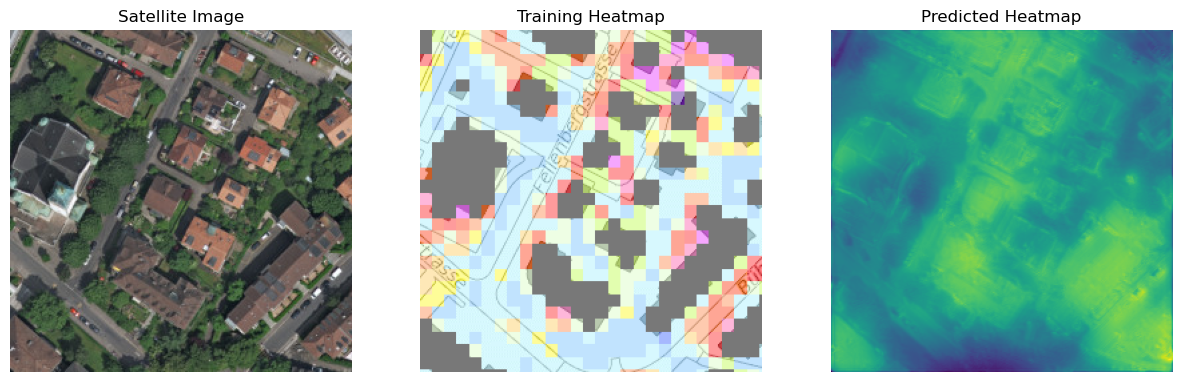

In [12]:
# Load the trained model
model = UNet()
model.load_state_dict(torch.load("/Users/janne/Library/CloudStorage/OneDrive-ETHZurich/ML_Shared/03TrainedModel/satellite_to_heatmap_unet.pth"))
model.eval()  # Set model to evaluation mode

# Directories
output_dir = '/Users/janne/Library/CloudStorage/OneDrive-ETHZurich/ML_Shared/Images/Prediction'
satellite_dir = '/Users/janne/Library/CloudStorage/OneDrive-ETHZurich/ML_Shared/Images/Satellite'
heatmap_dir = '/Users/janne/Library/CloudStorage/OneDrive-ETHZurich/ML_Shared/Images/Heatmap'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Define the same transformations used during training
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Function to predict and display heatmap for a random satellite image
def predict_and_display_heatmap(model, satellite_dir, heatmap_dir, output_dir, transform):
    satellite_files = os.listdir(satellite_dir)
    random_file = random.choice(satellite_files)
    
    # Load and transform the satellite image
    satellite_image_path = os.path.join(satellite_dir, random_file)
    satellite_image = Image.open(satellite_image_path)
    satellite_tensor = transform(satellite_image).unsqueeze(0)  # Add batch dimension

    # Load the corresponding training heatmap
    heatmap_image_path = os.path.join(heatmap_dir, random_file.replace("satellite", "heatmap"))
    heatmap_image = Image.open(heatmap_image_path)

    # Predict the heatmap
    with torch.no_grad():
        predicted_heatmap = model(satellite_tensor)

    # Remove batch dimension and convert to numpy
    predicted_heatmap = predicted_heatmap.squeeze(0).squeeze(0).cpu().numpy()

    # Save the predicted heatmap
    output_file = random_file.replace("satellite", "prediction")
    output_path = os.path.join(output_dir, output_file)
    save_image(torch.tensor(predicted_heatmap).unsqueeze(0), output_path)
    print(f"Predicted heatmap saved to {output_path}")

    # Display the satellite image, training heatmap, and predicted heatmap
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(satellite_image)
    plt.title("Satellite Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap_image)
    plt.title("Training Heatmap")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(predicted_heatmap, cmap='viridis')
    plt.title("Predicted Heatmap")
    plt.axis("off")

    plt.show()

# Run the prediction and display
predict_and_display_heatmap(model, satellite_dir, heatmap_dir, output_dir, transform)